In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,True
1,37,Female,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,True
2,41,Female,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,True
3,56,Female,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,True
4,57,Female,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,True


In [ ]:
df.shape

(303, 14)

In [ ]:
#filling NaN values in 'sex' column with the most common values
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [ ]:
#converting 'sex' into numerical values
df['sex'] = df['sex'].map({'Male' : 1, 'Female': 0})

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
x = df.iloc[:,:13]
y = df.iloc[:,13]

In [ ]:
#spliting the data into training set and testing set
X_test, X_train, y_test, y_train = train_test_split(x,y, test_size = 0.2, random_state= 42)

In [ ]:
# scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
classifier.score(X_test, y_test)

0.8016528925619835

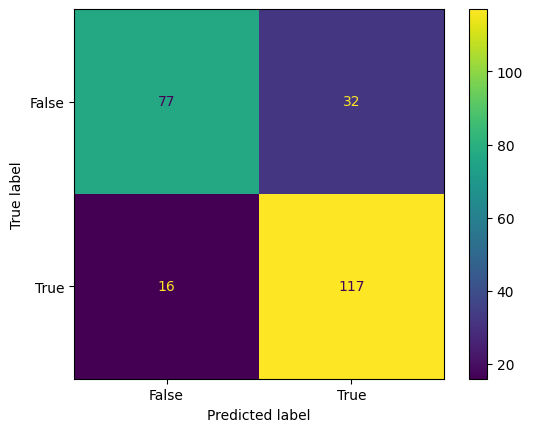

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2',C=0.001,solver='liblinear', max_iter=2000,random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(C=0.001, max_iter=2000, random_state=42, solver='liblinear')

In [ ]:
y__pred = log_reg.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test,y__pred)}')

Accuracy score: 0.78099173553719


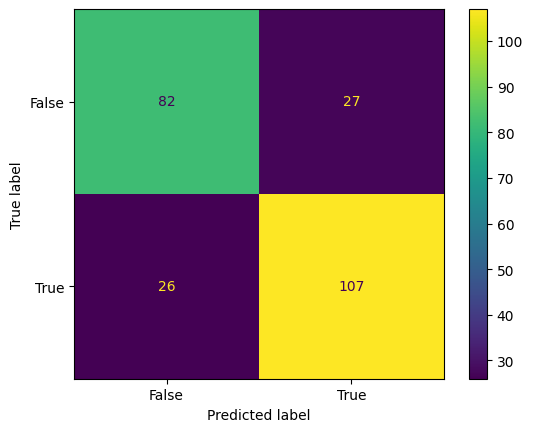

In [ ]:
cm = confusion_matrix(y_test, y__pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = log_reg.classes_)
disp.plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
model = tree.predict(X_test)


In [ ]:
print("Accuracy score:", accuracy_score(y_test, model))

Accuracy score: 0.7520661157024794


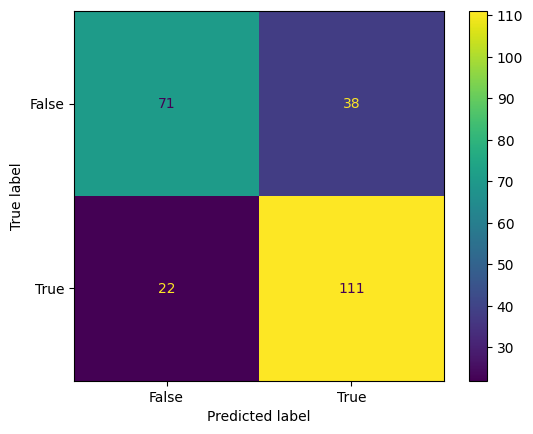

In [ ]:
cm = confusion_matrix(y_test, model)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = tree.classes_)
disp.plot()

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


LinearSVC(random_state=42)

In [ ]:

y__pred = model.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test,y__pred)}')

Accuracy score: 0.7107438016528925


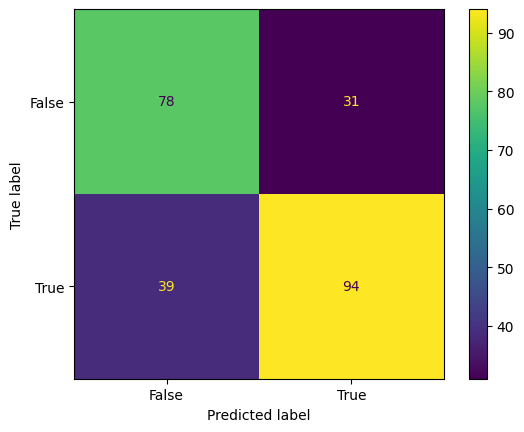

In [ ]:
cm = confusion_matrix(y_test, y__pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)
disp.plot()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8057851239669421


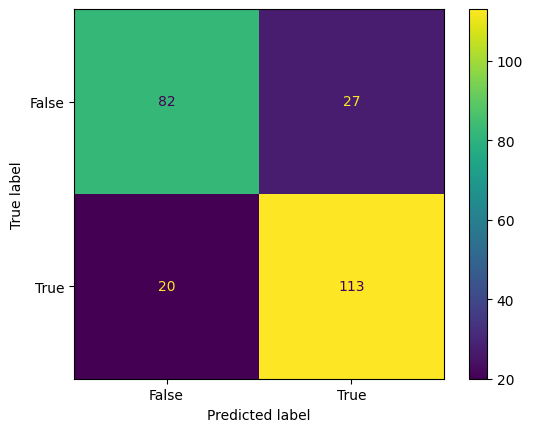

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)
disp.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7851239669421488


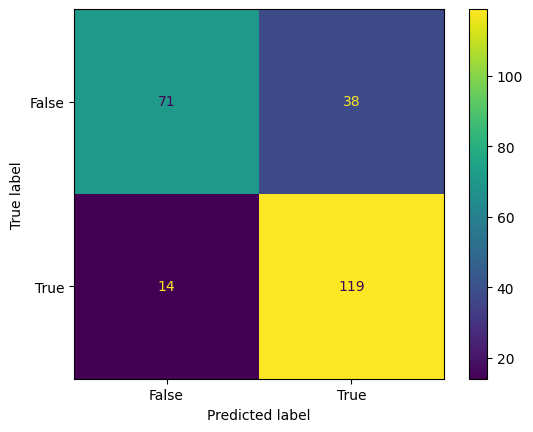

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)
disp.plot()

In [ ]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'Linear SVC': LinearSVC(max_iter=10000, random_state=42),
    'Kernel SVC (RBF)': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

results_df = pd.DataFrame(results)



In [ ]:
print("Model Performance Comparison:\n")
print(results_df.sort_values(by='Accuracy', ascending=False))


Model Performance Comparison:

                 Model  Accuracy
4     Kernel SVC (RBF)  0.805785
0                  KNN  0.801653
5        Random Forest  0.785124
1  Logistic Regression  0.764463
2        Decision Tree  0.752066
3           Linear SVC  0.710744


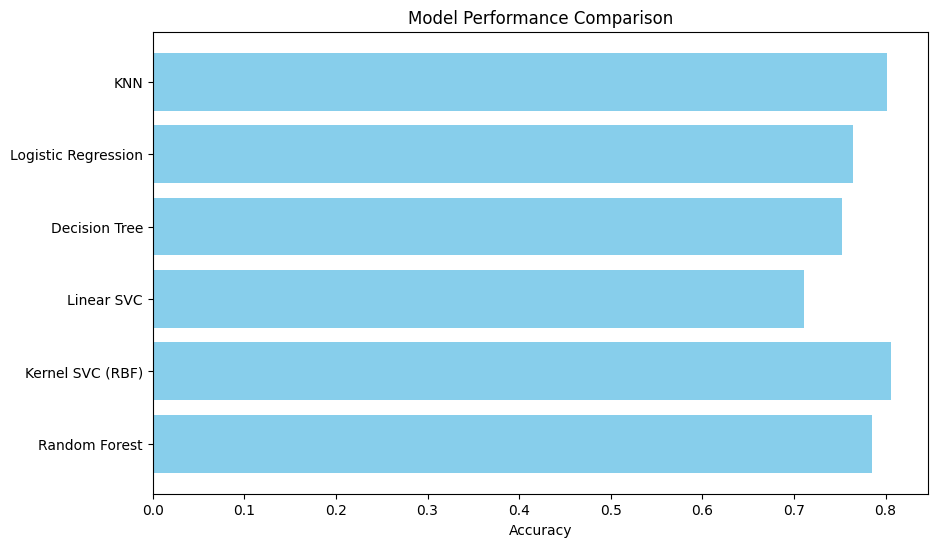

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()
